In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"C:\Users\91977\OneDrive\Desktop\prtc\smartkart_full_sales_data.csv")
df

,Order_ID,Customer_ID,Order_Date,Ship_Date,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Region
0,2001,C205,2025-01-17,2025-01-22,P1149,Office Supplies,Pens,Pilot Pen,137337.72,5,0.10,2746.75,North
1,2002,C147,2024-10-04,2024-10-11,P1111,Office Supplies,Binders,Staples Binder,60488.39,10,0.15,-1814.65,South
2,2003,C151,2024-11-01,2024-11-04,P1120,Office Supplies,Binders,Office Depot Binder,29567.83,9,0.05,2069.75,South
3,2004,C203,2024-08-06,2024-08-07,P1133,Furniture,Tables,Conference Table,126757.66,8,0.05,8873.04,North
4,2005,C016,2024-06-18,2024-06-25,P1019,Office Supplies,Binders,Staples Binder,71284.84,9,0.15,-2138.55,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2996,C280,2024-12-30,2025-01-06,P1016,Technology,Laptops,Lenovo ThinkPad,127074.41,9,0.00,15248.93,South
996,2997,C046,2025-03-26,2025-03-31,P1174,Office Supplies,Pens,Reynolds Pen,92695.16,9,0.05,6488.66,West
997,2998,C183,2025-03-17,2025-03-19,P1113,Office Supplies,Pens,Parker Pen,74447.03,10,0.20,-5955.76,North
998,2999,C216,2024-06-22,2024-06-29,P1109,Technology,Mobiles,iPhone 13,52999.54,5,0.20,-4239.96,West


In [4]:
df.head()

,Order_ID,Customer_ID,Order_Date,Ship_Date,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Region
0,2001,C205,2025-01-17,2025-01-22,P1149,Office Supplies,Pens,Pilot Pen,137337.72,5,0.10,2746.75,North
1,2002,C147,2024-10-04,2024-10-11,P1111,Office Supplies,Binders,Staples Binder,60488.39,10,0.15,-1814.65,South
2,2003,C151,2024-11-01,2024-11-04,P1120,Office Supplies,Binders,Office Depot Binder,29567.83,9,0.05,2069.75,South
3,2004,C203,2024-08-06,2024-08-07,P1133,Furniture,Tables,Conference Table,126757.66,8,0.05,8873.04,North
4,2005,C016,2024-06-18,2024-06-25,P1019,Office Supplies,Binders,Staples Binder,71284.84,9,0.15,-2138.55,East


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order_ID      1000 non-null   int64  
 1   Customer_ID   1000 non-null   object 
 2   Order_Date    1000 non-null   object 
 3   Ship_Date     1000 non-null   object 
 4   Product_ID    1000 non-null   object 
 5   Category      1000 non-null   object 
 6   Sub_Category  1000 non-null   object 
 7   Product_Name  1000 non-null   object 
 8   Sales         1000 non-null   float64
 9   Quantity      1000 non-null   int64  
 10  Discount      1000 non-null   float64
 11  Profit        1000 non-null   float64
 12  Region        1000 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 101.7+ KB


In [7]:
df.isnull().sum()

Order_ID        0
Customer_ID     0
Order_Date      0
Ship_Date       0
Product_ID      0
Category        0
Sub_Category    0
Product_Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
Region          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order_ID      1000 non-null   int64         
 1   Customer_ID   1000 non-null   object        
 2   Order_Date    1000 non-null   datetime64[ns]
 3   Ship_Date     1000 non-null   datetime64[ns]
 4   Product_ID    1000 non-null   object        
 5   Category      1000 non-null   object        
 6   Sub_Category  1000 non-null   object        
 7   Product_Name  1000 non-null   object        
 8   Sales         1000 non-null   float64       
 9   Quantity      1000 non-null   int64         
 10  Discount      1000 non-null   float64       
 11  Profit        1000 non-null   float64       
 12  Region        1000 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usage: 101.7+ KB


In [12]:
df['Clean_Profit'] = df['Profit'].apply(lambda x : x if x>=0 else 0)
df['clean_Loss'] = df['Profit'].apply(lambda x:abs(x) if x<0 else 0)

In [13]:
df.head()

,Order_ID,Customer_ID,Order_Date,Ship_Date,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Region,Clean_Profit,clean_Loss
0,2001,C205,2025-01-17,2025-01-22,P1149,Office Supplies,Pens,Pilot Pen,137337.72,5,0.10,2746.75,North,2746.75,0.00
1,2002,C147,2024-10-04,2024-10-11,P1111,Office Supplies,Binders,Staples Binder,60488.39,10,0.15,-1814.65,South,0.00,1814.65
2,2003,C151,2024-11-01,2024-11-04,P1120,Office Supplies,Binders,Office Depot Binder,29567.83,9,0.05,2069.75,South,2069.75,0.00
3,2004,C203,2024-08-06,2024-08-07,P1133,Furniture,Tables,Conference Table,126757.66,8,0.05,8873.04,North,8873.04,0.00
4,2005,C016,2024-06-18,2024-06-25,P1019,Office Supplies,Binders,Staples Binder,71284.84,9,0.15,-2138.55,East,0.00,2138.55


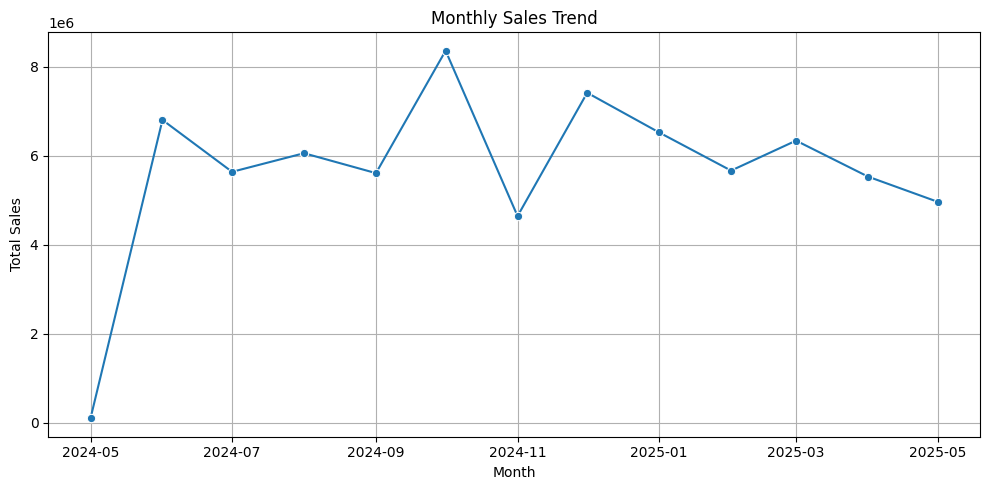

In [16]:
monthly_sales = df.groupby(df['Order_Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
resion_Sale =df.groupby('Region')['Sales'].sum().sort_values()
print(resion_Sale)

Region
West     17295599.50
East     17888644.34
South    18265202.89
North    20230743.12
Name: Sales, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

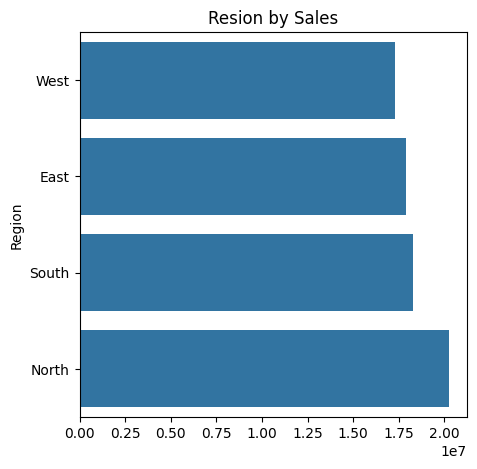

In [29]:
plt.figure(figsize=(5,5))
sns.barplot(x=resion_Sale.values,y=resion_Sale.index,)
plt.title("Resion by Sales")
plt.show

In [47]:
resion_profit = df.groupby('Region')['Clean_Profit'].sum()
resion_Loss = df.groupby('Region')['clean_Loss'].sum()
print(resion_profit)
print(resion_Loss)

Region
East     639787.48
North    768758.05
South    795929.91
West     726188.26
Name: Clean_Profit, dtype: float64
Region
East     425966.38
North    496358.30
South    394952.62
West     390140.38
Name: clean_Loss, dtype: float64


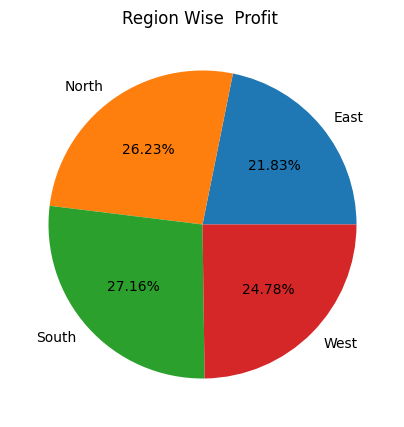

In [43]:
plt.figure(figsize=(5,5))
plt.pie(resion_profit,labels=resion_profit.index,autopct= '%1.2f%%')
plt.title('Region Wise  Profit ')
plt.show()

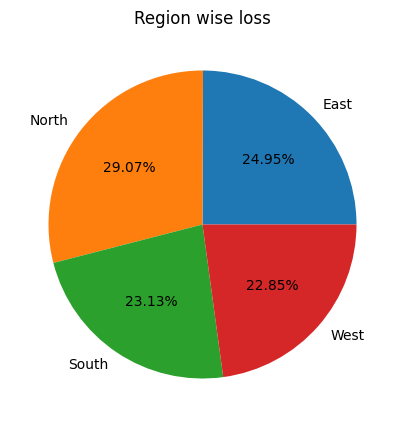

In [52]:
plt.figure(figsize=(5,5))
plt.pie(resion_Loss,labels=resion_Loss.index,autopct= '%1.2f%%')
plt.title("Region wise loss")
plt.show()

In [64]:
summary = df[['Clean_Profit','clean_Loss']].sum()
summary_df = summary.reset_index()
summary_df.columns =['Type','Amount']
print(summary_df)

           Type      Amount
0  Clean_Profit  2930663.70
1    clean_Loss  1707417.68


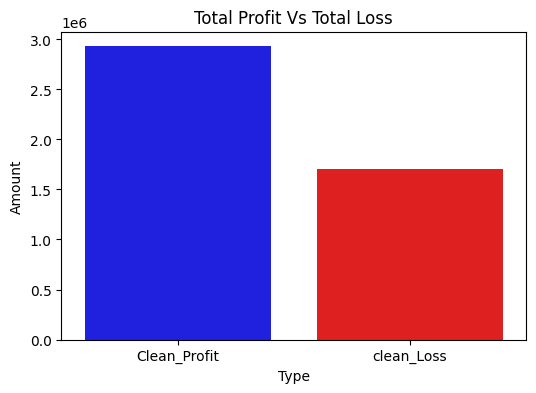

In [69]:
plt.figure(figsize=(6,4))
ax=sns.barplot(data=summary_df,
            x='Type', y='Amount',hue='Type',palette={'Clean_Profit':'Blue',
                                                     'clean_Loss':'red'})

plt.title( "Total Profit Vs Total Loss")
plt.show()

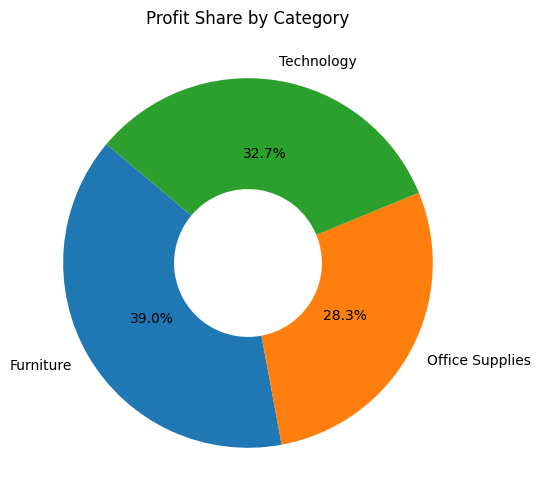

In [71]:
category_profit = df.groupby('Category')['Clean_Profit'].sum()

plt.figure(figsize=(6,6))
plt.pie(category_profit, labels=category_profit.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.6))
plt.title("Profit Share by Category")
plt.show()
